# Importing Libraries

In [3]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install tensorflow==2.16.1
!pip install keras==3.0.5

In [6]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (c:\Users\Alex\Desktop\ITC-2024\Plant_Disease_Prediction\Plant_Disease_Prediction\.conda\Lib\site-packages\keras\api\preprocessing\image\__init__.py)

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)


Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [ ]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')


#Visualising and Performing Prediction on Single image

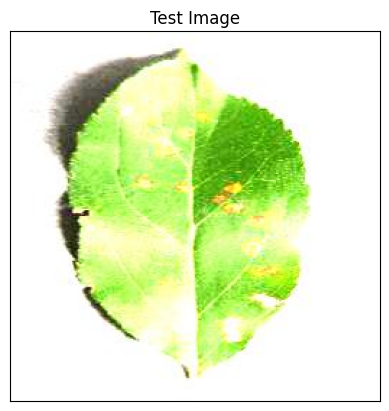

In [ ]:
import cv2
import matplotlib.pyplot as plt  # Add this line for Matplotlib

image_path = r'C:\Users\manar\OneDrive\Desktop\Plant_Disease_Prediction\test\AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB

# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


## Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)


1/1 [==============================] - 0s 157ms/step


In [ ]:
print(predictions)


[[1.4470450e-06 1.8021993e-08 9.9997675e-01 3.4031132e-08 2.3757983e-07
  3.1782443e-09 5.5812972e-11 2.4633227e-09 8.5811818e-12 1.2348396e-11
  4.3976080e-13 2.3697530e-10 9.0775880e-11 1.3964173e-11 2.2698430e-07
  2.7085866e-08 7.5591644e-10 3.4907774e-10 4.1256980e-09 9.1454876e-07
  1.2832920e-09 3.6491752e-09 5.6308235e-08 1.3690622e-09 4.2940973e-10
  6.1547079e-10 4.7261813e-11 4.3475998e-10 1.3742797e-06 4.9122654e-08
  1.6076483e-05 2.1422772e-11 1.0775781e-06 2.5136790e-10 1.1639846e-06
  1.0437155e-08 1.0126348e-08 5.2951066e-07]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)


2


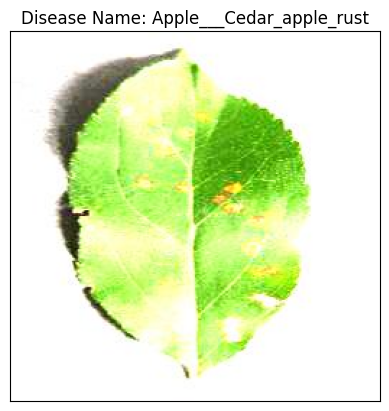

In [ ]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import img_to_array
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained model
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

# Function to preprocess and make predictions on the image
def predict_disease(image):
    # Preprocess the image
    image = cv2.resize(image, (128, 128))
    input_arr = img_to_array(image)
    input_arr = np.array([input_arr])

    # Make predictions
    predictions = cnn.predict(input_arr)
    result_index = np.argmax(predictions)

    return result_index

# Open the default camera
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Display the captured frame
    cv2.imshow('Frame', frame)

    # Preprocess and make predictions
    result_index = predict_disease(frame)
    model_prediction = class_name[result_index]

    # Display the prediction
    print("Predicted Disease:", model_prediction)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 118ms/step
Predicted Disease: Blueberry___healthy
1/1 [==============================] - 0s 39ms/step
Predicted Disease: Blueberry___healthy
1/1 [==============================] - 0s 28ms/step
Predicted Disease: Blueberry___healthy
1/1 [==============================] - 0s 43ms/step
Predicted Disease: Corn_(maize)___healthy
1/1 [==============================] - 0s 38ms/step
Predicted Disease: Corn_(maize)___healthy
1/1 [==============================] - 0s 37ms/step
Predicted Disease: Corn_(maize)___healthy
1/1 [==============================] - 0s 39ms/step
Predicted Disease: Corn_(maize)___healthy
1/1 [==============================] - 0s 33ms/step
Predicted Disease: Corn_(maize)___healthy
1/1 [==============================] - 0s 54ms/step
Predicted Disease: Corn_(maize)___healthy
1/1 [==============================] - 0s 39ms/step
Predicted Disease: Corn_(maize)___healthy
1/1 [==============================] - 0s 45ms/step
Predicted Diseas